# Tasks 2020
### [ Machine Learning and Statistics Module GMIT 2020 ]
---

Below are my solutions to the Task assessment.

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*

---

## Table of Contents
* [Task 1](#task1)
    * [Test of the function](#Test_of_the_function1)
* [Task 2](#task2)
    * [Test of the function](#Test_of_the_function2)
* [Task 3](#task3)
    * [Test of the function](#Test_of_the_function3)
* [Task 4](#task4)
    * [Test of the function](#Test_of_the_function4)

---

### __TASK 1__: Calculate square root of 2 to 100 decimal places <a name="task1"></a>

<img align="left" width="200" height="200" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/A_First_Letter_Square_root_of_2.svg/1280px-A_First_Letter_Square_root_of_2.svg.png">


To calculate the square root, we can use _Digit-by-digit calculation of principal roots of decimal numbers_ [1] with binary shift operations [2].

$$ x_n = x + floor(\frac{a}{x}) >> 1 $$

The above approach finds an **integer** of the square root of $a$ to $n$ number of digits (in order to override limitation of floating point precision in Python).

For this to work we need to consider $a$ as below [3]:

$$ a = a * (10^{2*n})$$

After we have recieved the integer of the square root we covert it so we can place the decimal point at the right location [4]

> 1. Wikipedia: Methods of computing square roots: https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Decimal_(base_10)
2. Wikipedia: Integer square root: https://en.wikipedia.org/wiki/Integer_square_root#Digit-by-digit_algorithm
3. The On-Line Encyclopedia of Integer Sequences: Prime sieve of the square root of 2: https://oeis.org/A248831
4. Stack Overflow: How to add commas at required positions in the given string: https://stackoverflow.com/questions/47751102/how-to-add-commas-at-required-positions-in-the-given-string-in-python

In [1]:
def sqrt2(a=2, digits=100):
    """
    Function that calculates a square root of 2 to 100 decimal places
    """
    # Raising 2 in order to get an integer instead of a float in the result
    a = a * (10**(2*digits))
    x = 0
    # Initial guess for the root
    x_next = 1 * (10**digits)
    # Loop until it reaches requested number of digits
    while x != x_next:
        x = x_next
        # Calculate a better guess for the square root and shift the result one diggit to the right
        x_next = (x + (a // x)) >> 1
    # Converting integer to a list
    x_next = list(str(x_next))
    # Add the decimal point at the correct location
    for i, j in enumerate([1]):
         x_next.insert(i + j, '.')
    # Join list into one string
    print(''.join(x_next))

<br>

#### Test of the function <a name="Test_of_the_function1"></a>
Below is the test of the above function.

In [2]:
sqrt2()

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


***

<br>

### __TASK 2__: Verify the Chi-squared value <a name="task2"></a>

<br>

<img align="left" width="150" height="150" src="https://images-na.ssl-images-amazon.com/images/I/61B6FqgRKJL.png">

<br>

Consider the table below:

 * | A | B | C | D | total
:-- | :-- | :-- | :-- | :-- | :--
White collar | 90 | 60 | 104 | 95 | 349
Blue collar	| 30 | 50 | 51 | 20 | 151
No collar | 30 | 40 | 45 | 35 | 150
Total | 150 | 150 | 200 | 150 | 650

_where A, B, C, and D are four neighbourhoods;_

_"white collar", "blue collar", or "no collar" are occupation of randomly selected 650 residents._

This is an example of Chi-squared test for categorical data. The Chi-squared value based on the above table is approximately 24.6. [1] In order to verify this value and calculate the associated p value I will be using a function from [scipy.stats package](https://docs.scipy.org/doc/scipy/reference/stats.html) that computes a Chi-square test of independence of variables in a contingency table. [2]

> 1. [Wikipedia: Chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test)
2. [SciPy: scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

***
<br>

#### General setup

In [3]:
# Efficient numerical arrays.
import numpy as np
# Data frames.
import pandas as pd
# Statistics.
import scipy.stats as ss
# Plotting.
import matplotlib.pyplot as plt
# Another package for plotting.
import seaborn as sns

In [4]:
# Colour scheme and styles for plots.
sns.set_theme(palette="Set2", context="paper", font_scale=1.5)

# Better sized plots.
plt.rcParams['figure.figsize'] = (15, 11)

***

<br>

#### Simulate the example table

In [5]:
# Create a raw data identical to the example.
raw_data = [['White collar', 90, 60, 104, 95, 349],
            ['Blue collar', 30, 50, 51, 20, 151],
            ['No collar', 30, 40, 45, 35, 150],
            ['Total', 150, 150, 200, 150, 650]]  

# Create a data frame. 
df = pd.DataFrame(raw_data, columns=[' ', 'A', 'B', 'C', 'D', 'Total'])

# Display the data frame.
df

,,A,B,C,D,Total
0,White collar,90,60,104,95,349
1,Blue collar,30,50,51,20,151
2,No collar,30,40,45,35,150
3,Total,150,150,200,150,650


***

<br>

#### Plot the data.

In [6]:
# Separate the data frame by collars:
wc = df.loc[df.loc[:, ' '] == 'White collar']
bc = df.loc[df.loc[:, ' '] == 'Blue collar']
nc = df.loc[df.loc[:, ' '] == 'No collar']
total = df.loc[df.loc[:, ' '] == 'Total']

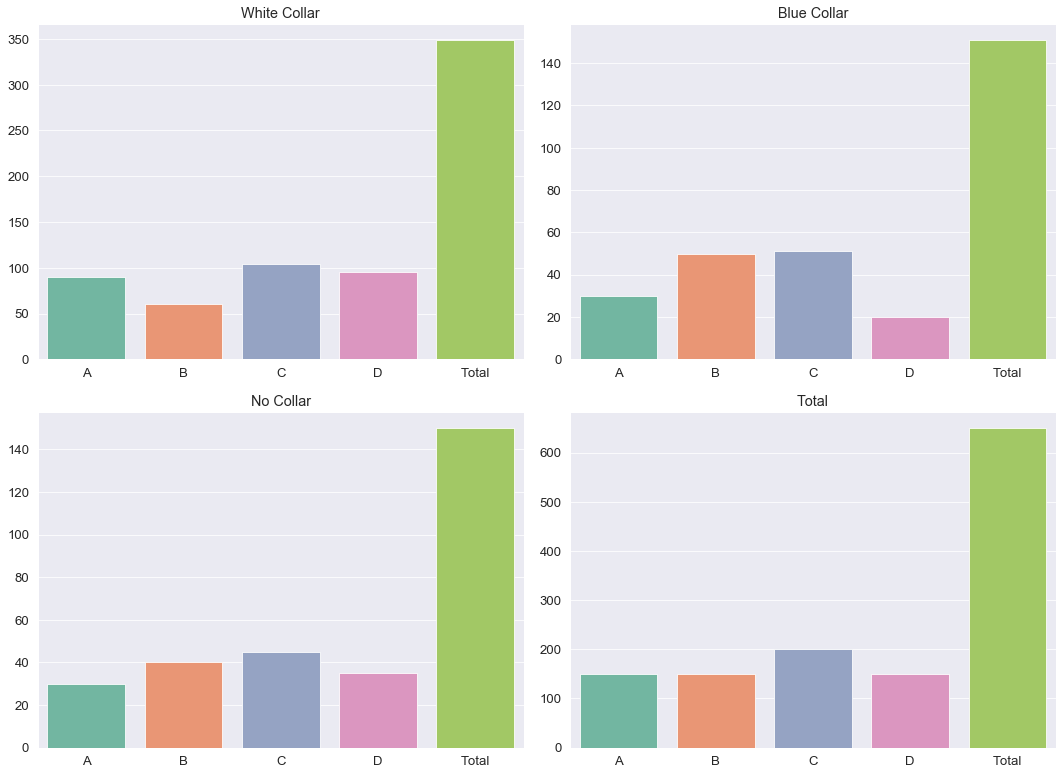

In [7]:
# Create 2x2 subplot.
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, sharey=False)

# Build a plot for White collar.
sns.barplot(data=wc, ax=ax1).set_title('White Collar')

# Build a plot for Blue collar.
sns.barplot(data=bc, ax=ax2).set_title('Blue Collar')

# Build a plot for No collar.
sns.barplot(data=nc, ax=ax3).set_title('No Collar')

# Build a plot for Total.
sns.barplot(data=total, ax=ax4).set_title('Total')

# Clean up whitespace padding.
fig.tight_layout()

# Display plots.
plt.show()

***

<br>

#### Perform Chi-square test

In [8]:
# Extract data from raw_data for each collar (dof = 6)
wc = raw_data[0][1:5]
bc = raw_data[1][1:5]
nc = raw_data[2][1:5]

# Create an array of observed data.
obs = np.array([wc,bc,nc])

# Run Chi-Square test.
chi_stat, p, dof, expctd = ss.chi2_contingency(obs)

In [9]:
print(f"Chi-squared value: {chi_stat}")
print(f"The associated p-value: {p}")

Chi-squared value: 24.5712028585826
The associated p-value: 0.0004098425861096696


***

#### Concussion

Based on the results of the test performed above the verification was successful and the Chi-squared value is approximately 24.6. Since the P-value (approximately 0.0004) and less than the significance level (0.5), it is statistically significant.

***

<br>

### __TASK 3__:  <a name="task3"></a>

<br>
